<a href="https://colab.research.google.com/github/yosshi18/examen-final/blob/main/examen_revisar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar librerías necesarias en Google Colab
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow plotly -q

In [2]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
# Visualización avanzada
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

print("📊 Librerías importadas correctamente")
print(f"🔥 TensorFlow versión: {tf.__version__}")
print(f"🐼 Pandas versión: {pd.__version__}")

📊 Librerías importadas correctamente
🔥 TensorFlow versión: 2.19.0
🐼 Pandas versión: 2.2.2


In [6]:
print("🔄 Generando dataset de tendencias salariales...")

# Crear dataset sintético con tendencias realistas
np.random.seed(42)
years = list(range(1973, 2021))
n_years = len(years)

# Sectores económicos
sectors = ['Tecnología', 'Finanzas', 'Salud', 'Educación', 'Manufactura', 'Retail']

# Generar datos sintéticos
data = []
for year in years:
    for sector in sectors:
        # Tendencia general creciente con variabilidad
        base_salary = 25000 + (year - 1973) * 800  # Crecimiento base

        # Factor sectorial
        sector_multipliers = {
            'Tecnología': 1.4 + (year - 1973) * 0.02,
            'Finanzas': 1.3 + (year - 1973) * 0.015,
            'Salud': 1.2 + (year - 1973) * 0.01,
            'Educación': 0.9,
            'Manufactura': 1.1 - (year - 1973) * 0.005,
            'Retail': 0.8
        }

        # Agregar recesiones (1980, 1991, 2008)
        recession_factor = 1.0
        if year in [1980, 1981, 1991, 2008, 2009]:
            recession_factor = 0.95

        salary = base_salary * sector_multipliers[sector] * recession_factor
        salary += np.random.normal(0, salary * 0.1)  # Ruido

        data.append({
            'Año': year,
            'Sector': sector,
            'Salario_Promedio': max(15000, salary),  # Salario mínimo
            'Nivel_Educativo': np.random.choice(['Secundaria', 'Licenciatura', 'Maestría', 'Doctorado'],
                                              p=[0.4, 0.35, 0.2, 0.05]),
            'Años_Experiencia': np.random.randint(0, 40),
            'Región': np.random.choice(['Noreste', 'Sur', 'Oeste', 'Centro'])
        })

df = pd.DataFrame(data)

print("✅ Dataset creado exitosamente")
print(f"📏 Dimensiones: {df.shape}")
print("\n📋 Primeras 5 filas:")
print(df.head())

print("\n📊 Información del dataset:")
print(df.info())

print("\n📈 Estadísticas descriptivas:")
print(df.describe())


🔄 Generando dataset de tendencias salariales...
✅ Dataset creado exitosamente
📏 Dimensiones: (288, 6)

📋 Primeras 5 filas:
    Año       Sector  Salario_Promedio Nivel_Educativo  Años_Experiencia  \
0  1973   Tecnología      36738.499536    Licenciatura                20   
1  1973     Finanzas      32050.641021    Licenciatura                22   
2  1973        Salud      23967.111331      Secundaria                 2   
3  1973    Educación      21391.192294      Secundaria                23   
4  1973  Manufactura      27561.110023      Secundaria                27   

   Región  
0   Oeste  
1   Oeste  
2     Sur  
3  Centro  
4  Centro  

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               288 non-null    int64  
 1   Sector            288 non-null    object 
 2   Salario_Promedio  288 n


🔍 ANÁLISIS EXPLORATORIO DE DATOS


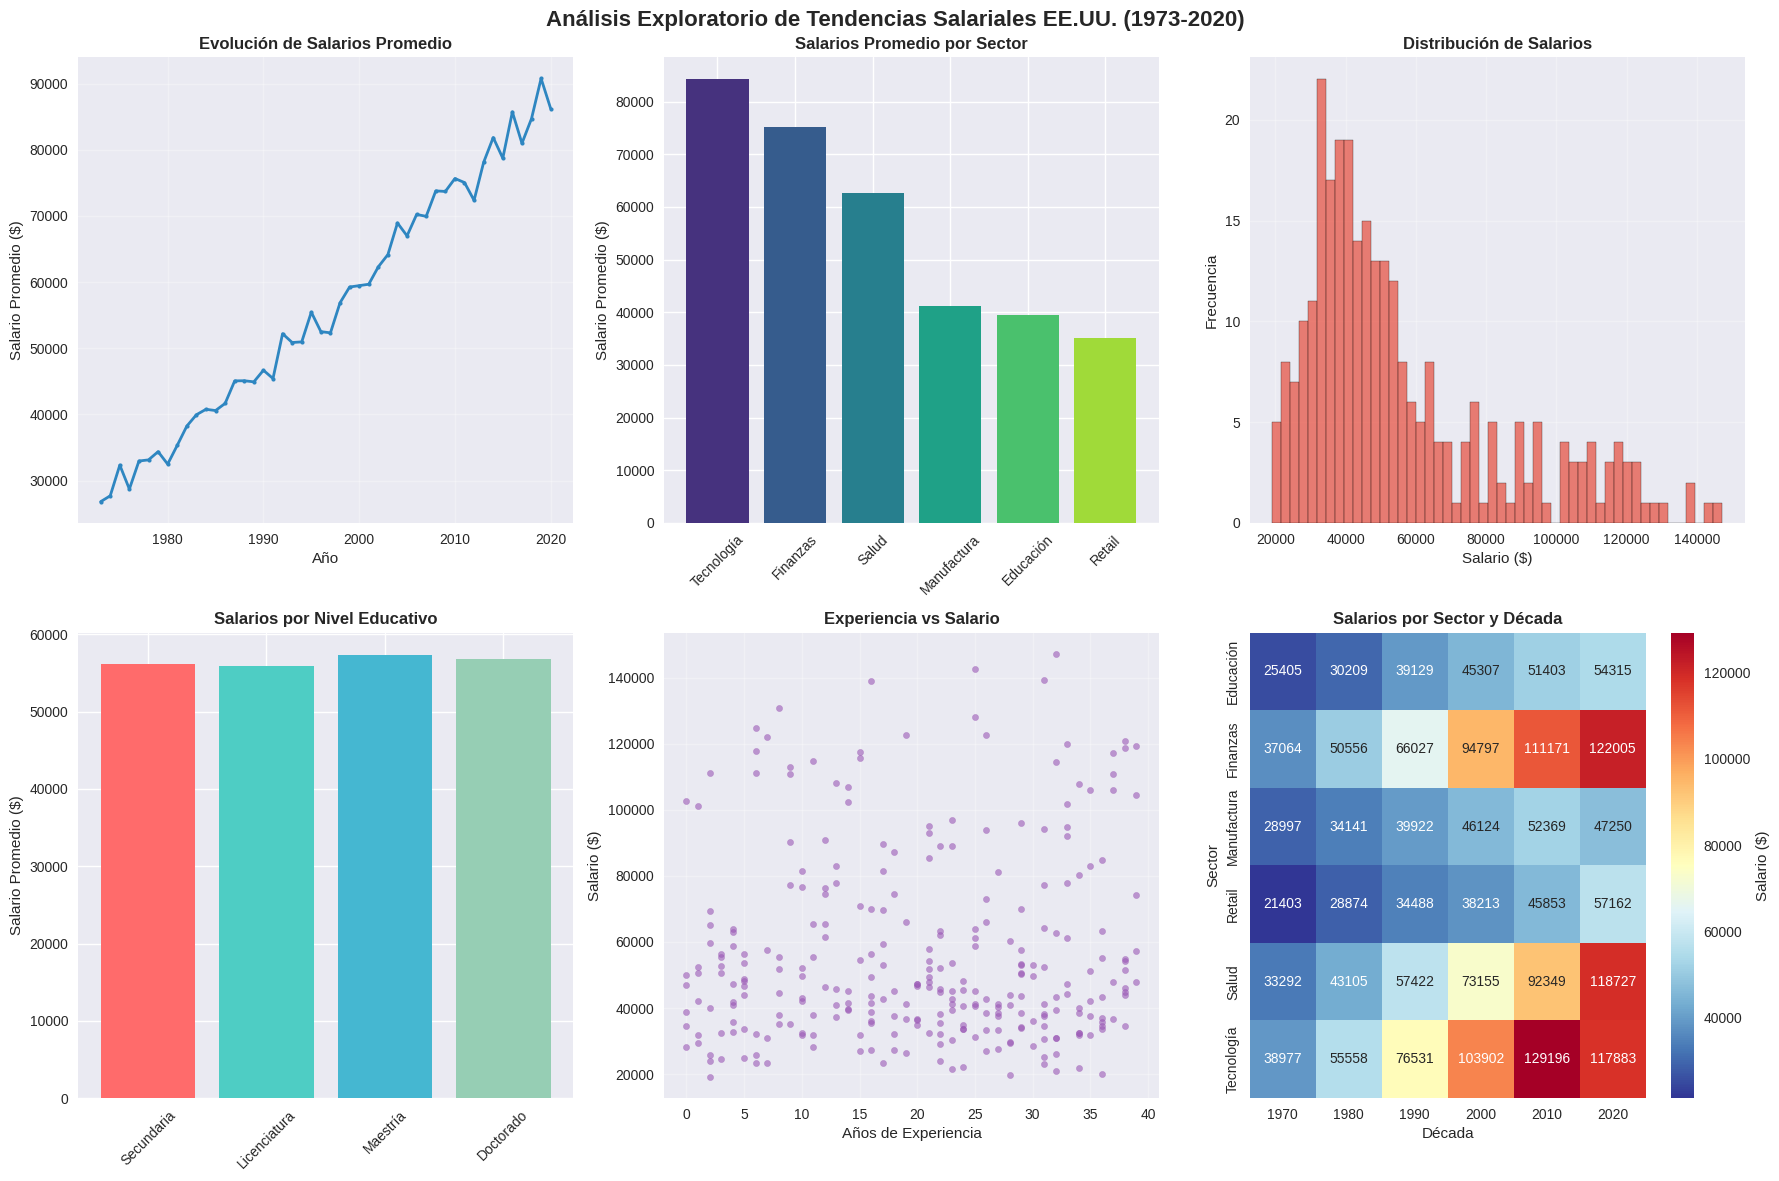


📊 Matriz de Correlación:


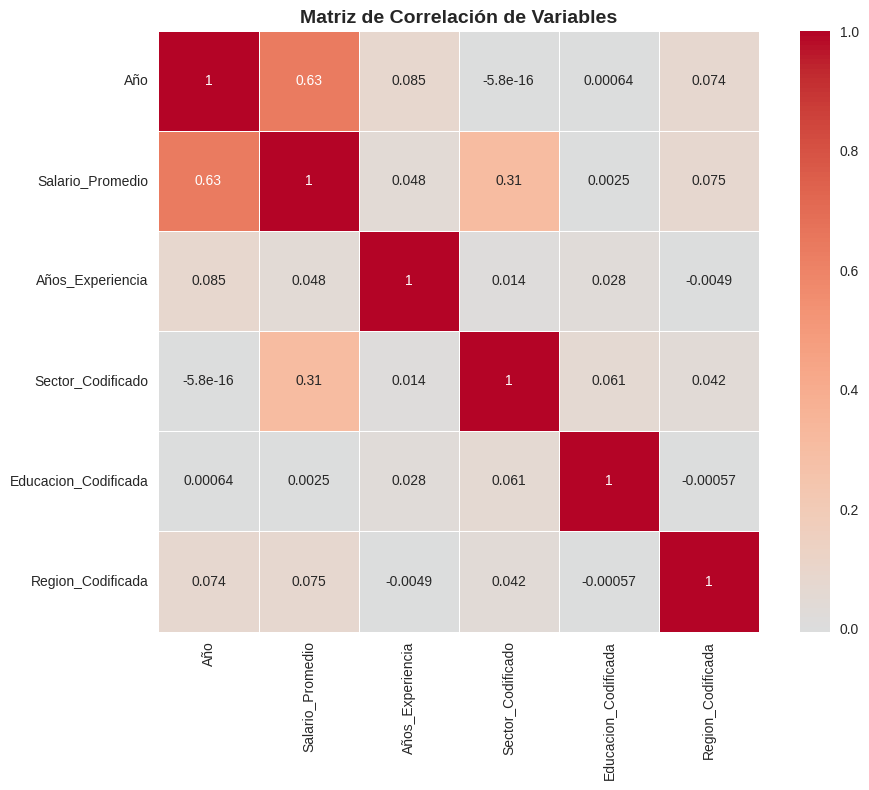

In [7]:
print("\n🔍 ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 50)

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Exploratorio de Tendencias Salariales EE.UU. (1973-2020)',
             fontsize=16, fontweight='bold')

# 1. Evolución temporal de salarios promedio
salary_by_year = df.groupby('Año')['Salario_Promedio'].mean()
axes[0, 0].plot(salary_by_year.index, salary_by_year.values,
                linewidth=2, color='#2E86C1', marker='o', markersize=3)
axes[0, 0].set_title('Evolución de Salarios Promedio', fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Salario Promedio ($)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Salarios por sector
salary_by_sector = df.groupby('Sector')['Salario_Promedio'].mean().sort_values(ascending=False)
bars = axes[0, 1].bar(range(len(salary_by_sector)), salary_by_sector.values,
                      color=sns.color_palette("viridis", len(salary_by_sector)))
axes[0, 1].set_title('Salarios Promedio por Sector', fontweight='bold')
axes[0, 1].set_xticks(range(len(salary_by_sector)))
axes[0, 1].set_xticklabels(salary_by_sector.index, rotation=45)
axes[0, 1].set_ylabel('Salario Promedio ($)')

# 3. Distribución de salarios
axes[0, 2].hist(df['Salario_Promedio'], bins=50, alpha=0.7, color='#E74C3C', edgecolor='black')
axes[0, 2].set_title('Distribución de Salarios', fontweight='bold')
axes[0, 2].set_xlabel('Salario ($)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].grid(True, alpha=0.3)

# 4. Salarios por nivel educativo
salary_by_education = df.groupby('Nivel_Educativo')['Salario_Promedio'].mean()
education_order = ['Secundaria', 'Licenciatura', 'Maestría', 'Doctorado']
salary_ordered = [salary_by_education[edu] for edu in education_order]
axes[1, 0].bar(education_order, salary_ordered,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 0].set_title('Salarios por Nivel Educativo', fontweight='bold')
axes[1, 0].set_ylabel('Salario Promedio ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Correlación experiencia vs salario
axes[1, 1].scatter(df['Años_Experiencia'], df['Salario_Promedio'],
                   alpha=0.6, c='#9B59B6', s=20)
axes[1, 1].set_title('Experiencia vs Salario', fontweight='bold')
axes[1, 1].set_xlabel('Años de Experiencia')
axes[1, 1].set_ylabel('Salario ($)')
axes[1, 1].grid(True, alpha=0.3)

# 6. Heatmap de salarios por sector y década
df['Década'] = (df['Año'] // 10) * 10
salary_heatmap = df.groupby(['Sector', 'Década'])['Salario_Promedio'].mean().unstack()
sns.heatmap(salary_heatmap, annot=True, fmt='.0f', cmap='RdYlBu_r',
            ax=axes[1, 2], cbar_kws={'label': 'Salario ($)'})
axes[1, 2].set_title('Salarios por Sector y Década', fontweight='bold')

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\n📊 Matriz de Correlación:")
# Preparar datos numéricos para correlación
df_numeric = df.copy()
le_sector = LabelEncoder()
le_education = LabelEncoder()
le_region = LabelEncoder()

df_numeric['Sector_Codificado'] = le_sector.fit_transform(df['Sector'])
df_numeric['Educacion_Codificada'] = le_education.fit_transform(df['Nivel_Educativo'])
df_numeric['Region_Codificada'] = le_region.fit_transform(df['Región'])

correlation_cols = ['Año', 'Salario_Promedio', 'Años_Experiencia',
                   'Sector_Codificado', 'Educacion_Codificada', 'Region_Codificada']
corr_matrix = df_numeric[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
print("\n🔧 PREPROCESAMIENTO DE DATOS")
print("=" * 40)

# Crear features adicionales
df['Crecimiento_Salarial'] = df.groupby('Sector')['Salario_Promedio'].pct_change()
df['Años_Desde_1973'] = df['Año'] - 1973

# Definir tendencias (para clasificación)
df['Tendencia_Salarial'] = pd.cut(df['Salario_Promedio'],
                           bins=3,
                           labels=['Bajo', 'Medio', 'Alto'])

# Preparar datos para modelos
feature_columns = ['Año', 'Años_Experiencia', 'Años_Desde_1973']
X_basic = df[feature_columns].copy()
X_encoded = df_numeric[['Año', 'Años_Experiencia', 'Sector_Codificado',
                       'Educacion_Codificada', 'Region_Codificada']].copy()

y_regression = df['Salario_Promedio']
y_classification = df['Tendencia_Salarial'].dropna()
X_classification = X_encoded.loc[y_classification.index]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("✅ Preprocesamiento completado")
print(f"📊 Features para regresión: {X_encoded.shape}")
print(f"🎯 Target regresión: {y_regression.shape}")
print(f"📊 Features para clasificación: {X_classification.shape}")
print(f"🏷️ Target clasificación: {y_classification.shape}")


🔧 PREPROCESAMIENTO DE DATOS
✅ Preprocesamiento completado
📊 Features para regresión: (288, 5)
🎯 Target regresión: (288,)
📊 Features para clasificación: (288, 5)
🏷️ Target clasificación: (288,)



🤖 MODELOS DE MACHINE LEARNING

📈 Modelo de Regresión - Predicción de Salarios
📊 Regresión Lineal:
   ECM: $413,569,193.22
   EAM: $16,367.02
   R²: 0.402

🏷️ Modelo de Clasificación - Tendencias de Salario
🎯 Clasificador Random Forest:
   Precisión: 0.931

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       1.00      0.75      0.86         4
        Bajo       0.96      0.98      0.97        44
       Medio       0.80      0.80      0.80        10

    accuracy                           0.93        58
   macro avg       0.92      0.84      0.87        58
weighted avg       0.93      0.93      0.93        58



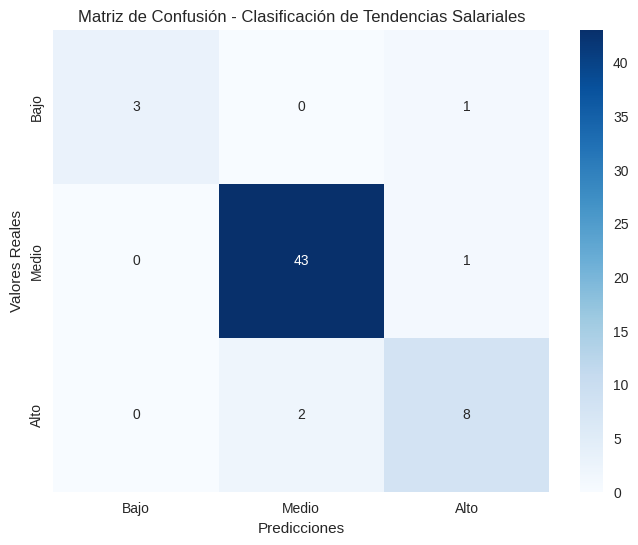

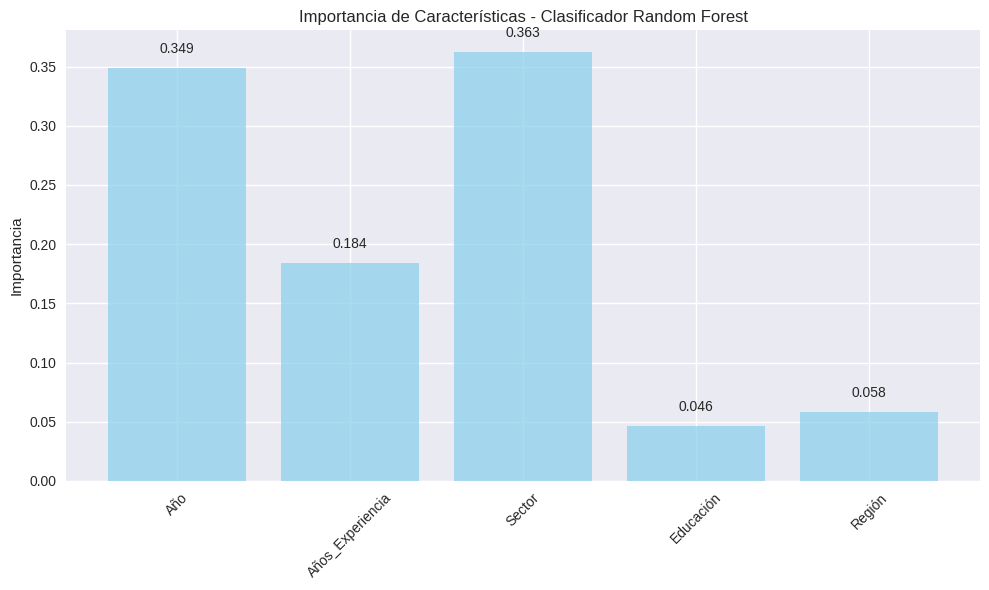

In [10]:
 print("\n🤖 MODELOS DE MACHINE LEARNING")
print("=" * 40)

# 5.1 MODELO DE REGRESIÓN
print("\n📈 Modelo de Regresión - Predicción de Salarios")

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_regression, test_size=0.2, random_state=42
)

# Random Forest Regressor (corregido)
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Métricas de regresión
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"📊 Regresión Lineal:")
print(f"   ECM: ${mse_lr:,.2f}")
print(f"   EAM: ${mae_lr:,.2f}")
print(f"   R²: {r2_lr:.3f}")

# 5.2 MODELO DE CLASIFICACIÓN
print("\n🏷️ Modelo de Clasificación - Tendencias de Salario")

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

y_pred_clf = rf_classifier.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print(f"🎯 Clasificador Random Forest:")
print(f"   Precisión: {accuracy:.3f}")

print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_clf))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.title('Matriz de Confusión - Clasificación de Tendencias Salariales')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

# Feature Importance
feature_names = ['Año', 'Años_Experiencia', 'Sector', 'Educación', 'Región']
importances = rf_classifier.feature_importances_

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, importances, color='skyblue', alpha=0.7)
plt.title('Importancia de Características - Clasificador Random Forest')
plt.ylabel('Importancia')
plt.xticks(rotation=45)

# Agregar valores en las barras
for bar, importance in zip(bars, importances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [11]:
print("\n🧠 DEEP LEARNING CON TENSORFLOW/KERAS")
print("=" * 45)

# Preparar datos para series temporales
def create_sequences(data, seq_length=5):
    """Crear secuencias para LSTM"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Preparar datos por sector para series temporales
print("📊 Preparando datos para Deep Learning...")

# Seleccionar un sector para el modelo LSTM (Tecnología como ejemplo)
tech_data = df[df['Sector'] == 'Tecnología'].sort_values('Año')
tech_salaries = tech_data['Salario_Promedio'].values

# Normalizar datos para LSTM
salary_scaler = StandardScaler()
salaries_normalized = salary_scaler.fit_transform(tech_salaries.reshape(-1, 1)).flatten()

# Crear secuencias
sequence_length = 5
X_seq, y_seq = create_sequences(salaries_normalized, sequence_length)

# División train/test para LSTM
train_size = int(len(X_seq) * 0.8)
X_train_lstm = X_seq[:train_size].reshape((train_size, sequence_length, 1))
X_test_lstm = X_seq[train_size:].reshape((len(X_seq) - train_size, sequence_length, 1))
y_train_lstm = y_seq[:train_size]
y_test_lstm = y_seq[train_size:]

print(f"✅ Datos preparados para LSTM:")
print(f"   Train: {X_train_lstm.shape}")
print(f"   Test: {X_test_lstm.shape}")

# 6.1 MODELO LSTM PARA SERIES TEMPORALES
print("\n🔄 Construyendo modelo LSTM...")

def build_lstm_model(input_shape):
    """Construir modelo LSTM"""
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model



🧠 DEEP LEARNING CON TENSORFLOW/KERAS
📊 Preparando datos para Deep Learning...
✅ Datos preparados para LSTM:
   Train: (34, 5, 1)
   Test: (9, 5, 1)

🔄 Construyendo modelo LSTM...


In [12]:
# Crear y entrenar modelo LSTM
lstm_model = build_lstm_model((sequence_length, 1))

print("📋 Arquitectura del modelo LSTM:")
lstm_model.summary()

📋 Arquitectura del modelo LSTM:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,921 (116.88 KB)

 Trainable params: 29,889 (116.75 KB)

 Non-trainable params: 32 (128.00 B)

In [13]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

print("\n🏃‍♂️ Entrenando modelo LSTM...")


🏃‍♂️ Entrenando modelo LSTM...


In [14]:
# Entrenar modelo
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 1.2565 - mae: 0.9653 - val_loss: 1.8931 - val_mae: 1.3257 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5390 - mae: 0.5773 - val_loss: 1.8648 - val_mae: 1.3152 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1811 - mae: 0.3488 - val_loss: 1.8350 - val_mae: 1.3038 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1027 - mae: 0.2466 - val_loss: 1.8169 - val_mae: 1.2969 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1383 - mae: 0.3179 - val_loss: 1.8148 - val_mae: 1.2961 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1804 - mae: 0.3528 - val_loss: 1.8181 - val_mae: 1.2973 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1209 - mae: 0.2707 - val_loss: 1.8303 - val_mae: 1.3020 - learning_rate: 0.0010
Epoch 8/100
3/3 ━━━

In [15]:
# Evaluar modelo LSTM
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n📊 Resultados LSTM:")
print(f"   Pérdida: {lstm_loss:.4f}")
print(f"   EAM: {lstm_mae:.4f}")



📊 Resultados LSTM:
   Pérdida: 1.8148
   EAM: 1.2961


In [16]:
# Predicciones LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm, verbose=0)

# Desnormalizar predicciones
y_test_denorm = salary_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_denorm = salary_scaler.inverse_transform(y_pred_lstm).flatten()

In [17]:
# 6.2 RED NEURONAL DENSA PARA CLASIFICACIÓN
print("\n🧠 Construyendo Red Neuronal Densa...")

def build_dense_model(input_dim, num_classes):
    """Construir modelo denso para clasificación"""
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Preparar datos para clasificación con DL
le_trend = LabelEncoder()
y_trend_encoded = le_trend.fit_transform(y_classification)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_scaled[y_classification.index], y_trend_encoded,
    test_size=0.2, random_state=42
)

# Crear y entrenar modelo denso
dense_model = build_dense_model(X_scaled.shape[1], len(np.unique(y_trend_encoded)))

print("📋 Arquitectura del modelo denso:")
dense_model.summary()

print("\n🏃‍♂️ Entrenando modelo denso...")

# Entrenar modelo denso
history_dense = dense_model.fit(
    X_train_dl, y_train_dl,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_dl, y_test_dl),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



🧠 Construyendo Red Neuronal Densa...
📋 Arquitectura del modelo denso:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,587 (45.26 KB)

 Non-trainable params: 384 (1.50 KB)


🏃‍♂️ Entrenando modelo denso...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 554ms/step - accuracy: 0.1743 - loss: 1.9320 - val_accuracy: 0.3621 - val_loss: 1.0960 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3427 - loss: 1.4507 - val_accuracy: 0.7069 - val_loss: 1.0357 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4464 - loss: 1.1039 - val_accuracy: 0.7931 - val_loss: 0.9801 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4873 - loss: 1.0817 - val_accuracy: 0.8103 - val_loss: 0.9320 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4745 - loss: 1.0456 - val_accuracy: 0.7931 - val_loss: 0.8877 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6892 - loss: 0.8078 - val_accuracy: 0.7931 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6

In [18]:
# Evaluar modelo denso
dense_loss, dense_accuracy = dense_model.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"\n📊 Resultados Red Neuronal Densa:")
print(f"   Pérdida: {dense_loss:.4f}")
print(f"   Precisión: {dense_accuracy:.4f}")


📊 Resultados Red Neuronal Densa:
   Pérdida: 0.5714
   Precisión: 0.8276


In [19]:
print("\n📈 VISUALIZACIÓN AVANZADA DE RESULTADOS")
print("=" * 45)

# 7.1 Resultados del modelo LSTM
plt.figure(figsize=(15, 10))


📈 VISUALIZACIÓN AVANZADA DE RESULTADOS


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

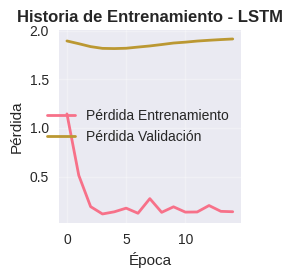

In [20]:
 #Subplot 1: Historia de entrenamiento LSTM
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2)
plt.title('Historia de Entrenamiento - LSTM', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

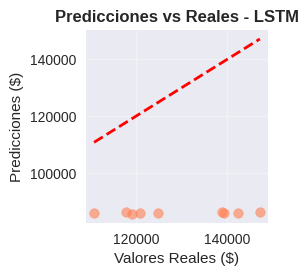

In [21]:
# Subplot 2: Predicciones vs Reales (LSTM)
plt.subplot(2, 3, 2)
plt.scatter(y_test_denorm, y_pred_denorm, alpha=0.6, color='coral')
plt.plot([y_test_denorm.min(), y_test_denorm.max()],
         [y_test_denorm.min(), y_test_denorm.max()], 'r--', lw=2)
plt.title('Predicciones vs Reales - LSTM', fontweight='bold')
plt.xlabel('Valores Reales ($)')
plt.ylabel('Predicciones ($)')
plt.grid(True, alpha=0.3)

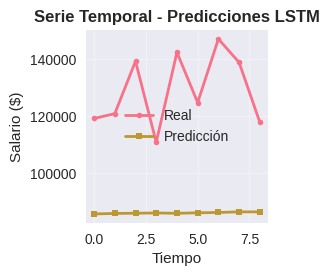

In [22]:
# Subplot 3: Serie temporal de predicciones
plt.subplot(2, 3, 3)
plt.plot(range(len(y_test_denorm)), y_test_denorm,
         label='Real', linewidth=2, marker='o', markersize=4)
plt.plot(range(len(y_pred_denorm)), y_pred_denorm,
         label='Predicción', linewidth=2, marker='s', markersize=4)
plt.title('Serie Temporal - Predicciones LSTM', fontweight='bold')
plt.xlabel('Tiempo')
plt.ylabel('Salario ($)')
plt.legend()
plt.grid(True, alpha=0.3)

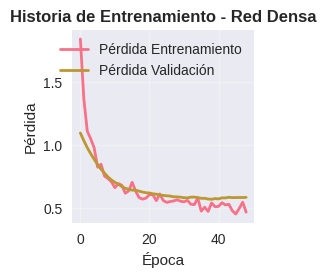

In [23]:
# Subplot 4: Historia de entrenamiento Red Densa
plt.subplot(2, 3, 4)
plt.plot(history_dense.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
plt.plot(history_dense.history['val_loss'], label='Pérdida Validación', linewidth=2)
plt.title('Historia de Entrenamiento - Red Densa', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

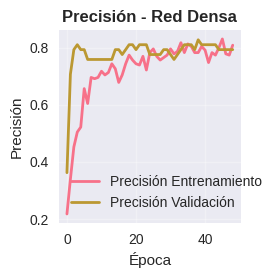

In [24]:
# Subplot 5: Accuracy Red Densa
plt.subplot(2, 3, 5)
plt.plot(history_dense.history['accuracy'], label='Precisión Entrenamiento', linewidth=2)
plt.plot(history_dense.history['val_accuracy'], label='Precisión Validación', linewidth=2)
plt.title('Precisión - Red Densa', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

(0.0, 1.0)

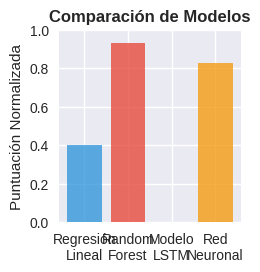

In [25]:
# Subplot 6: Comparación de modelos
plt.subplot(2, 3, 6)
models = ['Regresión\nLineal', 'Random\nForest', 'Modelo\nLSTM', 'Red\nNeuronal']
scores = [r2_lr, accuracy, 1 - lstm_mae, dense_accuracy]  # Normalizar métricas
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']

bars = plt.bar(models, scores, color=colors, alpha=0.8)
plt.title('Comparación de Modelos', fontweight='bold')
plt.ylabel('Puntuación Normalizada')
plt.ylim(0, 1)

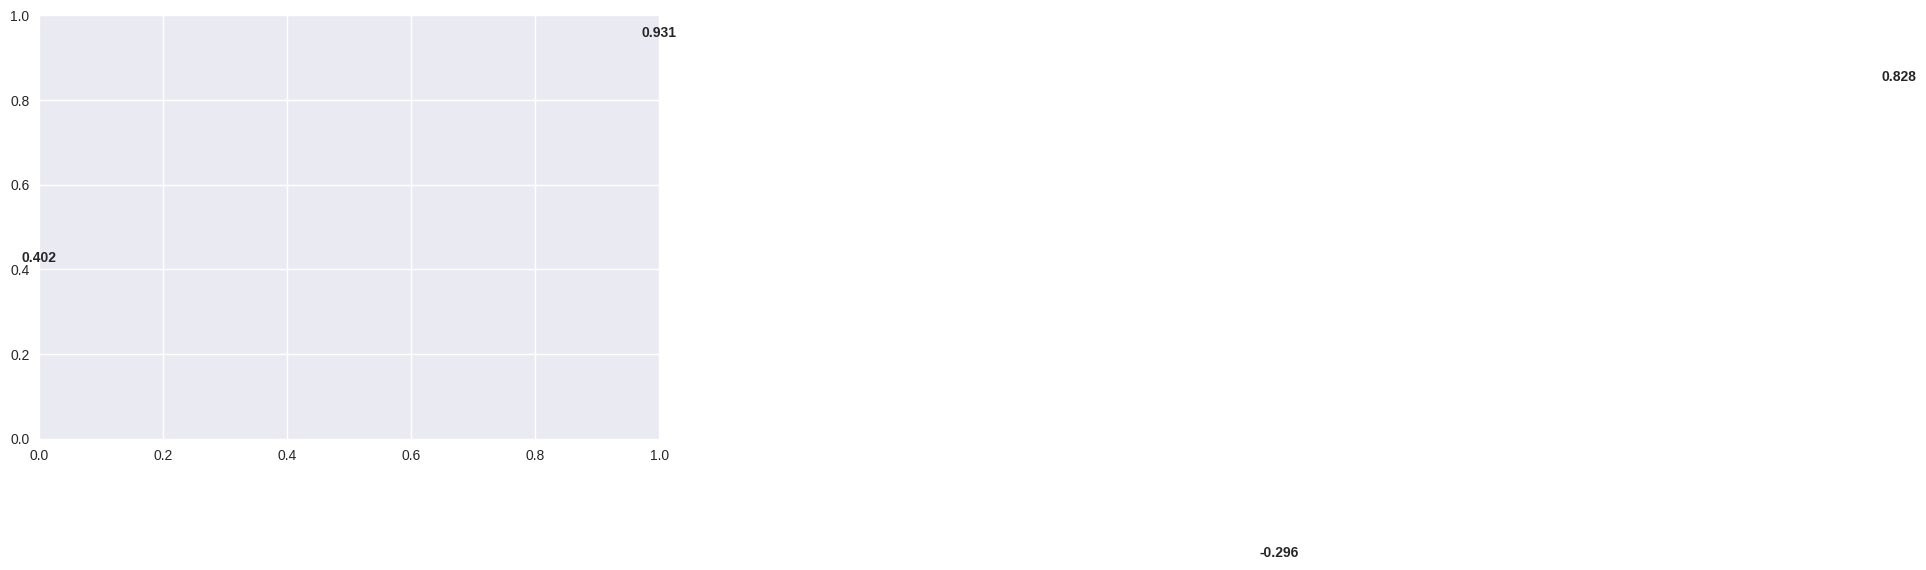

In [26]:
# Agregar valores en las barras
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
 # 7.2 Visualización interactiva con Plotly
print("\n🎨 Creando visualizaciones interactivas...")

# Gráfico interactivo de tendencias por sector
fig_sector = px.line(df, x='Año', y='Salario_Promedio', color='Sector',
                     title='Evolución de Salarios por Sector (1973-2020)',
                     labels={'Salario_Promedio': 'Salario Promedio ($)', 'Año': 'Año'})
fig_sector.update_layout(height=500, showlegend=True)
fig_sector.show()

# Gráfico de dispersión 3D
fig_3d = px.scatter_3d(df, x='Año', y='Años_Experiencia', z='Salario_Promedio',
                       color='Sector', size='Salario_Promedio',
                       title='Análisis 3D: Año vs Experiencia vs Salario')
fig_3d.show()



🎨 Creando visualizaciones interactivas...
